In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import additive_noise
from ML2_lib import algo_sgd
from ML2_lib import valid

In [2]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()


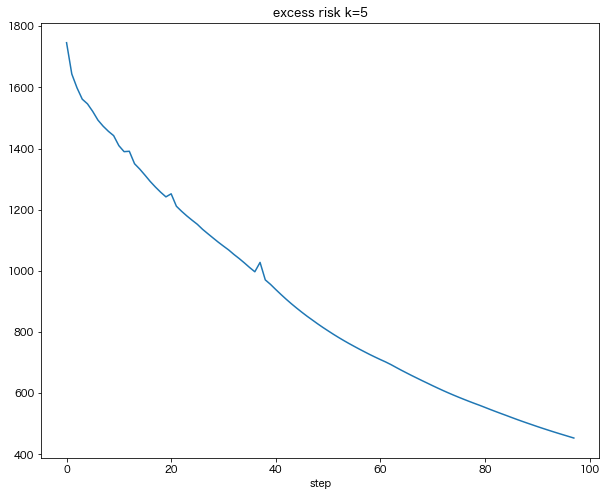

In [3]:
exp_normal = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)
k = 5
tr = exp_normal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

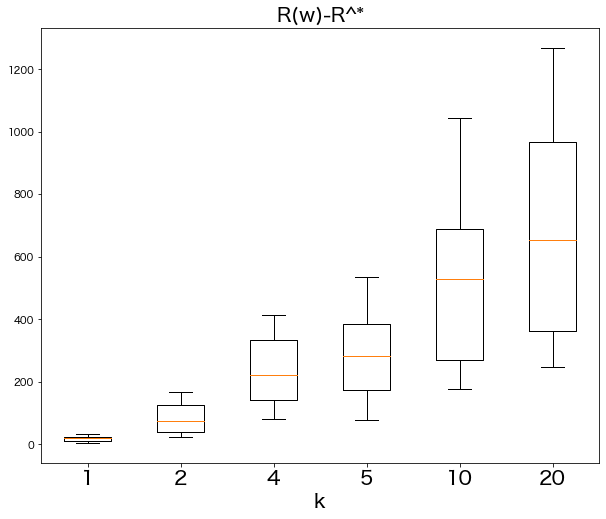

In [4]:
_, result_loss_normal = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_normal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [5]:
df = pd.DataFrame(result_loss_normal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,18.323359,84.290386,232.564285,296.379638,518.608050,676.638821
std,9.200799,51.709089,120.537928,157.542051,280.344626,357.669210
min,3.956784,24.652391,79.669976,76.375213,177.016267,248.316846
25%,11.355234,39.297715,142.729012,173.886705,268.600906,360.844596
50%,18.646944,75.745282,222.572139,280.897126,528.712855,653.345408
75%,23.683056,126.814470,332.985506,385.277217,688.480322,966.953594
max,34.109210,165.717505,415.092676,536.343789,1044.481904,1268.794747


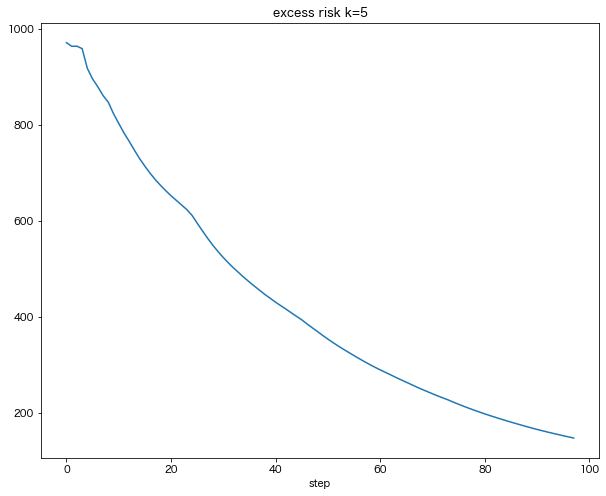

In [6]:
# 学習率は0.01/t * sqrt(d) ノイズはt対数正規分布
X_mean = 5
X_var = 2
E_var = 1.7
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()


exp_lognormal = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)
k = 5
tr = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

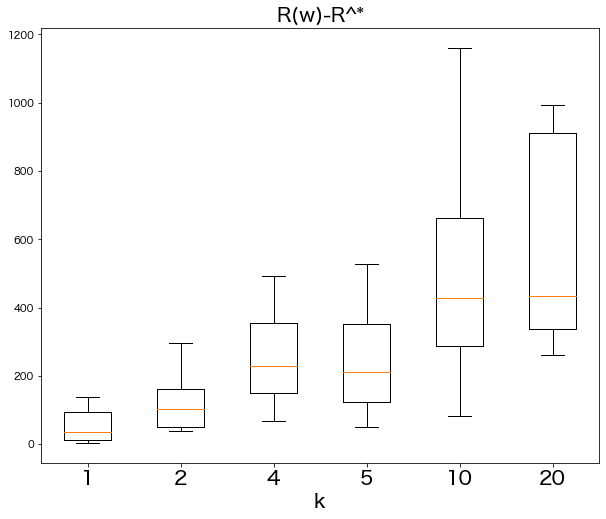

In [7]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [8]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,52.874137,128.181142,258.293166,240.771365,483.583802,585.778384
std,49.536201,95.932650,151.350396,152.225580,324.984191,304.830407
min,3.378872,38.237953,68.658820,48.952647,82.170260,261.404406
25%,11.381575,51.670664,148.555414,123.737553,287.775320,337.826396
50%,36.652186,102.863169,229.121588,212.653694,429.282678,434.972545
75%,93.769945,162.937137,354.505885,352.585888,663.615188,910.115677
max,137.848747,294.929020,491.865522,528.837877,1161.317626,994.811033
